# Ejercicios Pair Programming - Módulo 2 Sprint 2
## Lección 3 - EDA III
### Natalia García Lago y Noemi Azorín

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# establecemos el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (12,8)

#evitamos warnings
import warnings
warnings.filterwarnings('ignore')

Nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:

age
✔️ la limpiamos en el pair de Limpieza II
species
✔️ la limpiamos en el pair de Limpieza II
country
✔️ la limpiamos en el pair de Limpieza II
fatal
✔️ la limpiamos en el pair de Pandas V
year
✔️ es una columna de tipo float deberíamos convertirla a integer
sex
✔️ la limpiamos en el pair de Pandas V
fecha
✔️ la limpiamos en el pair de Pandas V

In [43]:
ataques = pd.read_csv("../ficheros/ataques_limpiezaII.csv")
ataques.head()

,Unnamed: 0,case_number,year,type,country,activity,age,species_,mes,fatal,sex,especies,edad
0,0,2018.06.25,2018,Boating,usa,Paddling,57,White shark,Jun,N,F,Tiburón Blanco,57
1,1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiburón tigre,18
2,2,2018.05.26.b,2018,Unprovoked,usa,Walking,15,"Bull shark, 6'",May,N,M,Tiburón toro,15
3,3,2018.05.24,2018,Provoked,australia,Feeding sharks,32,Grey reef shark,May,N,M,Tiburón Gris,32
4,4,2018.05.13.a,2018,Invalid,england,Fishing,21,Invalid incident,May,N,M,Unspecified,21


Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1 - Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

2 - Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

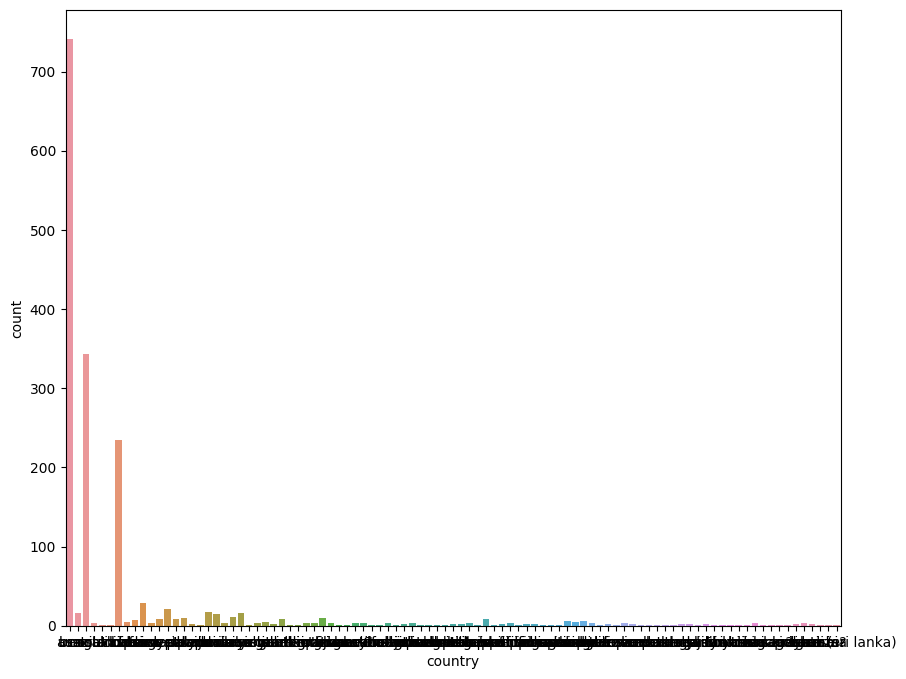

In [44]:
sns.countplot(x = ataques["country"], data = ataques); 
plt.show(); 

Observamos que mostrando todos los países no podemos hacer una interpretación clara, por lo que hacemos el estudio únicamente de los 10 países con más ataques.

In [161]:
ataques_pais = dict(ataques["country"].value_counts()[:10])
ataques_pais

{'usa': 741,
 'australia': 343,
 'south africa': 234,
 'bahamas': 29,
 'new zealand': 21,
 'reunion': 17,
 'brazil': 16,
 'papua new guinea': 16,
 'mexico': 15,
 'italy': 11}

In [162]:
df_ataques_pais = pd.DataFrame(ataques_pais.items(), columns= ["country", "numero de ataques"])
df_ataques_pais

,country,numero de ataques
0,usa,741
1,australia,343
2,south africa,234
3,bahamas,29
4,new zealand,21
5,reunion,17
6,brazil,16
7,papua new guinea,16
8,mexico,15
9,italy,11


In [ ]:
sns.barplot(x=ataques["country"].value_counts().index, y = ataques.value_counts().values)


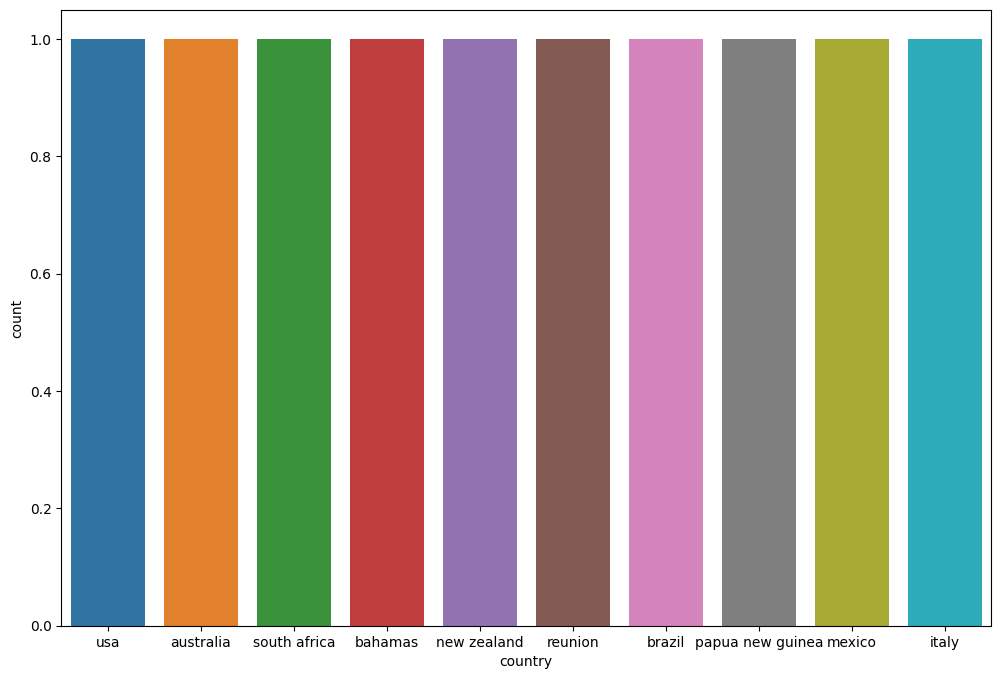

In [163]:
sns.countplot(x = "country", data = df_ataques_pais)
plt.show(); 

En la gráfica observamos que los países con más ataques son USA, Australia y South Africa.

 - Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [48]:
ataques_sex = ataques[["country","sex"]]
ataques_sex

,country,sex
0,usa,F
1,brazil,M
2,usa,M
3,australia,M
4,england,M
...,...,...
1667,australia,M
1668,australia,M
1669,usa,M
1670,panama,M


In [49]:
df_ataques_sex = ataques_sex.iloc[:10]
df_ataques_sex

,country,sex
0,usa,F
1,brazil,M
2,usa,M
3,australia,M
4,england,M
5,costa rica,M
6,australia,M
7,maldives,M
8,south africa,M
9,south africa,M


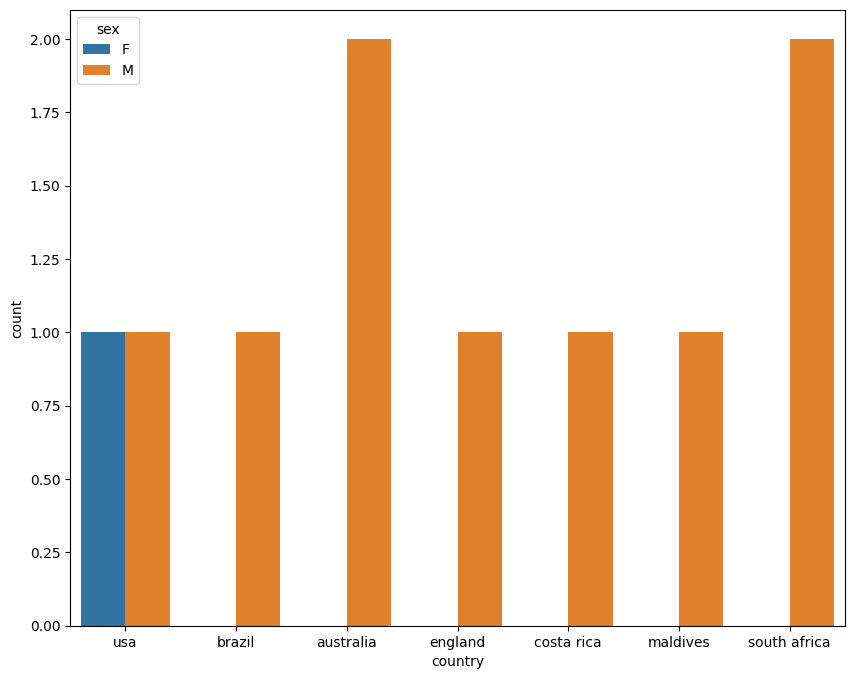

In [50]:
sns.countplot(x = df_ataques_sex["country"], data = df_ataques_sex, hue="sex"); 
plt.show(); 

En este gráfico observamos que la cantidad de ataques producidos en USA ha sido igual para hombres y mujeres. Sorprendentemente, en el resto de países no observamos ataques a mujeres.

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [51]:
ataques["grupos_edad"] = pd.cut(ataques["edad"], bins=["00", "19", "65", "100"] , labels=["joven", "adulto", "tercera edad"])

In [52]:
ataques.sample(5)

,Unnamed: 0,case_number,year,type,country,activity,age,species_,mes,fatal,sex,especies,edad,grupos_edad
1529,1529,1721.06.00,1721,Unprovoked,italy,Swimming,NaN,"White shark, 1600-lb female",NaN,Y,M,Tiburón Blanco,0,NaN
56,56,2016.09.07,2016,Unprovoked,usa,Swimming,51,"Tiger shark, 10'",Sep,N,F,Tiburón tigre,51,adulto
573,573,2005.06.18,2005,Invalid,usa,Swimming,49,Invalid,Jun,NaN,M,Unspecified,49,adulto
236,236,2012.12.28,2012,Unprovoked,australia,Paddle boarding,29,"Bull shark, 2m",Dec,N,M,Tiburón toro,29,NaN
45,45,2017.01.09,2017,Unprovoked,indonesia,Surfing,48,"Bull shark, 1 m",Jan,N,M,Tiburón toro,48,adulto


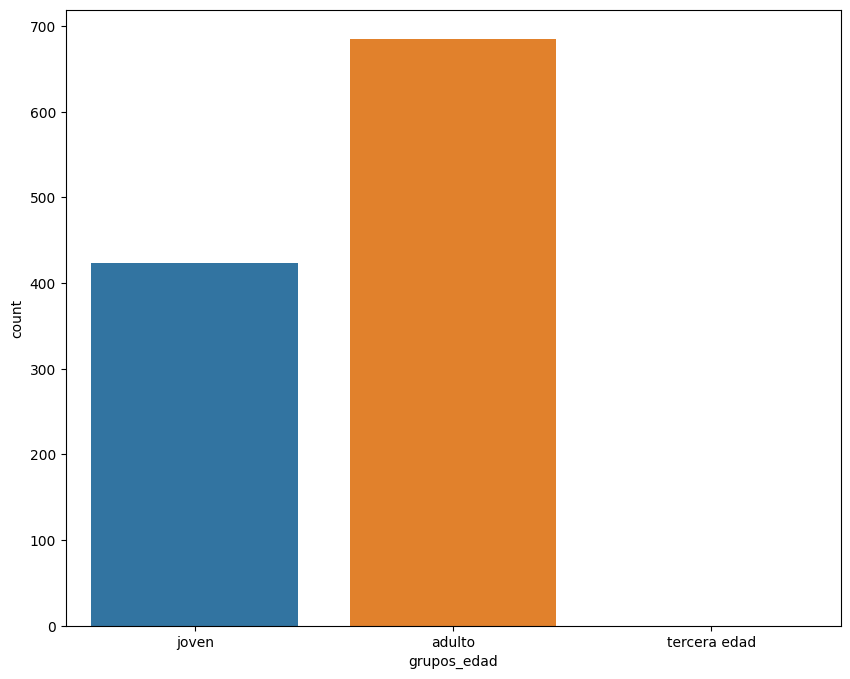

In [53]:
sns.countplot(x = ataques["grupos_edad"], data = ataques); 
plt.show(); 

In [54]:
ataques["edad"].unique()

array([57, 18, 15, 32, 21, 30, 60, 33, 19, 25, 10, 69, 55, 35, 20, 54, 22,
       31, 40, 37, 11, 13, 34, 50, 46, 48, 17, 28, 65, 73, 58, 36,  0, 51,
       61, 59, 42, 27, 23, 29, 39, 24, 12, 26, 71, 43, 44, 14, 62, 52, 38,
       68, 16, 47, 63, 70, 41, 53, 66, 45, 74, 64, 56, 49, 77, 84, 67],
      dtype=int64)

La mayoría de ataques se producen a adultos. Esto se puede deber a que son los adultos los que más se exponen practicando actividades acuáticas. Con el unique observamos que, efectívamente, hay muy pocos registros que se puedan corresponder a la tercera edad y por eso este grupo no se visualiza.

- Ataques entre sexos, ¿hay diferencia?

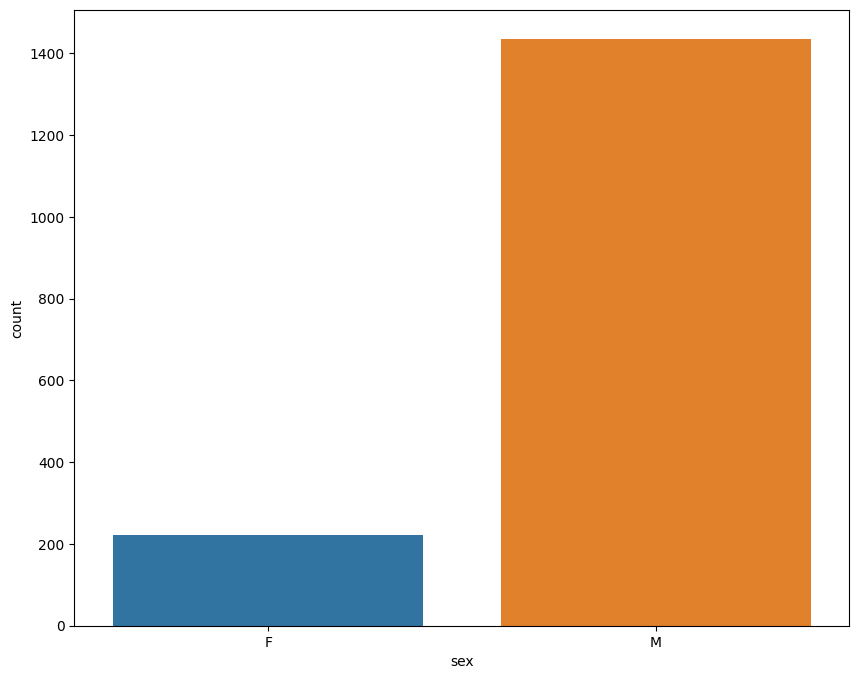

In [55]:
sns.countplot(x = ataques["sex"], data = ataques); 
plt.show(); 

A continuación vemos que la mayoría de ataques con diferencia a nivel mundial se producen a los hombres.

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

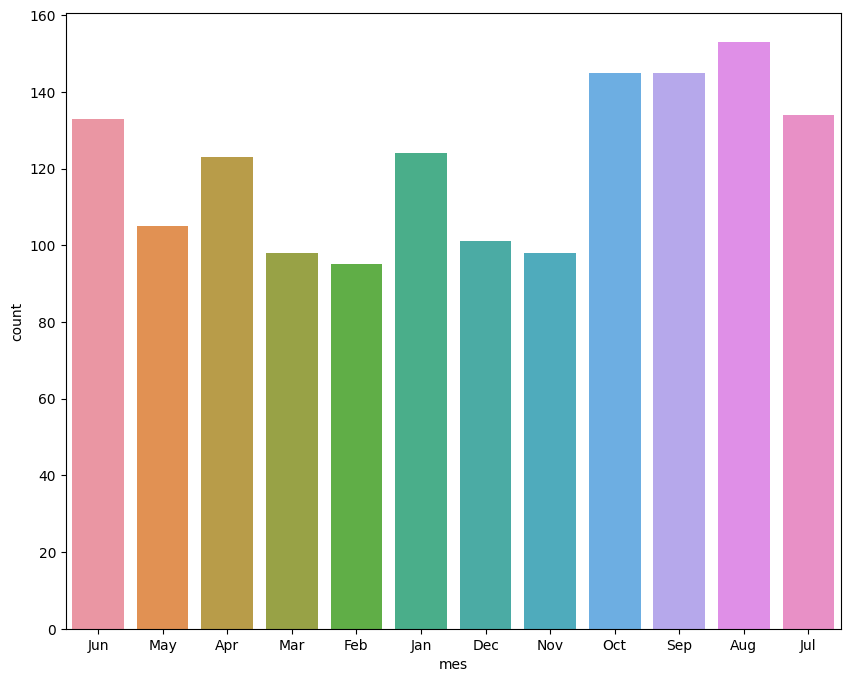

In [56]:
sns.countplot(x = ataques["mes"], data = ataques); 
plt.show(); 

Vemos que el mes en el que se producen más ataques es agosto, seguido por septiembre y octubre. El mes más seguro para practicar alguna actividad en el mar es febrero, también a nivel mundial.